# Исследование данных об удое коров с использованием линейных моделей машинного обучения

**Описание проекта:**

Заказчик проекта - владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Условия позволяют фермеру очень тщательно отобрать коров. У фермера есть два критерия для отбора коров:
1. Каждая корова должна давать в среднем не менее 6000 кг молока в год
1. Молоко должно быть вкусным

**Цель проекта** - проанализировать данные о коровах, предлагаемых к покупке, и отобрать подходящие под запросы клиента экземпляры.

В качестве исходных данных имеется 3 датасета
1. Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. Описание данных:
    * id — уникальный идентификатор коровы.
    * Удой, кг — масса молока, которую корова даёт в год (в килограммах).
    * ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
    * Сырой протеин, г — содержание сырого протеина в корме (в граммах).
    * СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
    * Порода — порода коровы.
    * Тип пастбища — ландшафт лугов, на которых паслась корова.
    * порода папы_быка — порода папы коровы.
    * Жирность,% — содержание жиров в молоке (в процентах).
    * Белок,% — содержание белков в молоке (в процентах).
    * Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
    * Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
1. Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных:
    * id — уникальный идентификатор коровы.
    * Имя Папы — имя папы коровы.
1. Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
    * Порода — порода коровы.
    * Тип пастбища — ландшафт лугов, на которых паслась корова.
    * порода папы_быка — порода папы коровы.
    * Имя_папы — имя папы коровы.
    * Текущая_жирность,% — содержание жиров в молоке (в процентах).
    * Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
    * Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

В ходе выполнения проекта будут реализованы следующие этапы:
1. Загрузка данных
1. Предобработка данных
1. Исследовательский анализ данных
1. Корреляционный анализ признаков в датасете ferma_main.csv
1. Решены задачи регрессии
    1. Построение первичной модели линейной регрессии по данным из датасета ferma_main.csv
    1. Построение второй модели линейной регрессии с устранением нелинейности во входных признаках
    1. Построение третьей модели линейной регрессии с добавлением признаков из файла ferma_dad.csv
    1. Произведено сравнение качества всех трех моделей между собой
    1. Оценено качество модели оп метрикам MSE, MAE, RMSE
    1. Спрогнозирован удой коров по лучшей из моделей
1. Решена задача классификации
    1. Построение логистической модели для предсказания вкуса молока
    1. Произведена оценка модели по метрикам recall и precision
    1. Будут определены пороговые значения принадлежностей к классам
    1. Спрогнозирован вкус молока для каждой из коров в датасете cow_buy.csv
1. Дано заключение о коровах пригодных к покупке

## Загрузка данных

### Импорт всех необходимых библиотек

In [1]:
! pip install phik

In [2]:
import pandas as pd
import numpy as np
import math
import phik
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import scipy.stats as st

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

### Загрузка датасетов из CSV файлов

In [3]:
df_ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')
df_ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';', decimal=',')
df_cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=',')

In [4]:
display(df_ferma_main.head())
display(df_ferma_dad.head())
df_cow_buy.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


### Проверка загруженных данных

In [5]:
display(df_ferma_main.info())
display(df_ferma_dad.info())
df_cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


### Итоги загрузки данных

В ходе загрузки данных сделано следующие:
1. Импортированы все необходимые библиотеки
1. Произведена корректная загрузка датасетов с учетом символов разделителей
1. Проведен первичный анализ данных на наличие пропусков и некорректно распознанных типов данных. Аномалий не выявлено

##  Предобработка данных

### Замена названиев столбцов

Для изменения имени столбцов создадим функцию. Она будет переводить названия столбцов в нижний регистр, убирать пробелы перед размерностями и заменять все остальные пробелы на символ "_"

In [6]:
def rename_columns(df):
    columns = df.columns.str.lower().to_list()
    new_columns = []
    for i in columns:
        new_columns.append(i.replace(', ', ' ')
                           .replace(' ', '_')
                           .replace(',', '_')
                           .replace('текущая_', '')
                           .replace('текущий_уровень_', ''))
    df.columns = new_columns
    display(df.columns)

In [7]:
rename_columns(df_ferma_main)
rename_columns(df_ferma_dad)
rename_columns(df_cow_buy)

Index(['id', 'удой_кг', 'эке_(энергетическая_кормовая_единица)',
       'сырой_протеин_г', 'спо_(сахаро-протеиновое_соотношение)', 'порода',
       'тип_пастбища', 'порода_папы_быка', 'жирность_%', 'белок_%',
       'вкус_молока', 'возраст'],
      dtype='object')

Index(['id', 'имя_папы'], dtype='object')

Index(['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 'жирность_%',
       'белок_%', 'возраст'],
      dtype='object')

### Обработка явных дубликатов

In [8]:
print('Полные дубликаты строк в ferma_main:', df_ferma_main.duplicated().value_counts(), sep='\n')
print('Полные дубликаты строк в ferma_dad:', df_ferma_dad.duplicated().value_counts(), sep='\n')
print('Полные дубликаты строк в cow_buy:', df_cow_buy.duplicated().value_counts(), sep='\n')

Полные дубликаты строк в ferma_main:
False    629
True       5
dtype: int64
Полные дубликаты строк в ferma_dad:
False    629
dtype: int64
Полные дубликаты строк в cow_buy:
False    16
True      4
dtype: int64


In [9]:
df_ferma_main.drop_duplicates(inplace=True)
df_cow_buy.drop_duplicates(inplace=True)

Явные дубликаты исключены

### Устранение неявных дубликатов

In [10]:
df_ferma_main['тип_пастбища'] = df_ferma_main['тип_пастбища'].str.replace('Равнинные', 'Равнинное')
df_ferma_main['порода_папы_быка'] = df_ferma_main['порода_папы_быка'].str.replace('Айдиалл', 'Айдиал')
df_ferma_main['тип_пастбища'] = df_ferma_main['тип_пастбища'].str.lower()

### Итоги предобработки данных

В ходе предобработки данных сделано следующие:
1. Названия столбцов приведены к корректному виду. Исключены пробелы и запятые
1. Произведен анализ типов данных. Они корректны правок не требуется
1. Устранены явные дубликаты строк
1. Устранены неявные дубликаты значений в столбце `тип_пастбища`

## Исследовательский анализ данных

Так как в нашем наборе данных есть столбцы как с категориальными, так и с количественными, необходимо их разделить. Создадим функцию которая на основании типа данных будет определять к какому типу относиться столбец

In [11]:
def cat_of_dtype(df):
    cat_col_names = []
    num_col_names = []
    for name in df.columns:
        if df[name].dtype == 'object':
            cat_col_names.append(name)
        else:
            num_col_names.append(name)
    return num_col_names, cat_col_names

In [12]:
num_col_names, cat_col_names = cat_of_dtype(df_ferma_main)

### Категориальные признаки

Построим гистограммы для всех признаков которые имеют категориальный тип.

In [13]:
cat_col_names

['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']

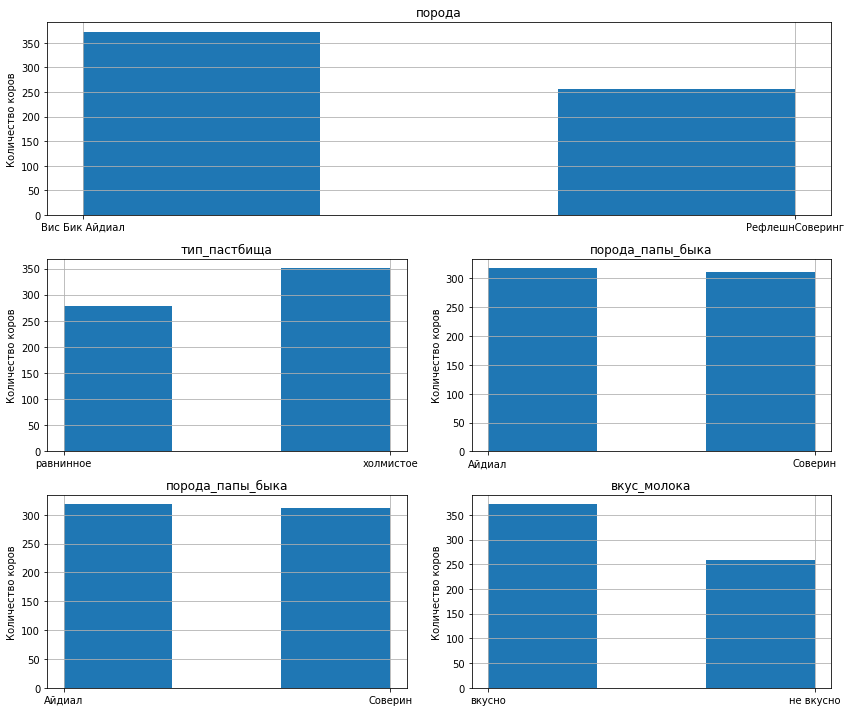

In [15]:
fig = plt.figure(tight_layout=True, figsize=(12,10))
gs = gridspec.GridSpec(3, 2)

ax = fig.add_subplot(gs[0, :])
ax.hist(df_ferma_main[cat_col_names[0]], bins=3)
ax.set_ylabel('Количество коров')
ax.set_title(cat_col_names[0])
ax.grid(True)

for i in range(1, 3):
    for j in range(2):
        ax = fig.add_subplot(gs[i, j])
        m = i + j
        ax.hist(df_ferma_main[cat_col_names[m]], bins=3)
        ax.set_ylabel('Количество коров')
        ax.set_title(cat_col_names[m])
        ax.grid(True)
plt.show()


### Количественные признаки

In [16]:
num_col_names

['id',
 'удой_кг',
 'эке_(энергетическая_кормовая_единица)',
 'сырой_протеин_г',
 'спо_(сахаро-протеиновое_соотношение)',
 'жирность_%',
 'белок_%']

In [17]:
num_col_names = num_col_names[1:]
num_col_names

['удой_кг',
 'эке_(энергетическая_кормовая_единица)',
 'сырой_протеин_г',
 'спо_(сахаро-протеиновое_соотношение)',
 'жирность_%',
 'белок_%']

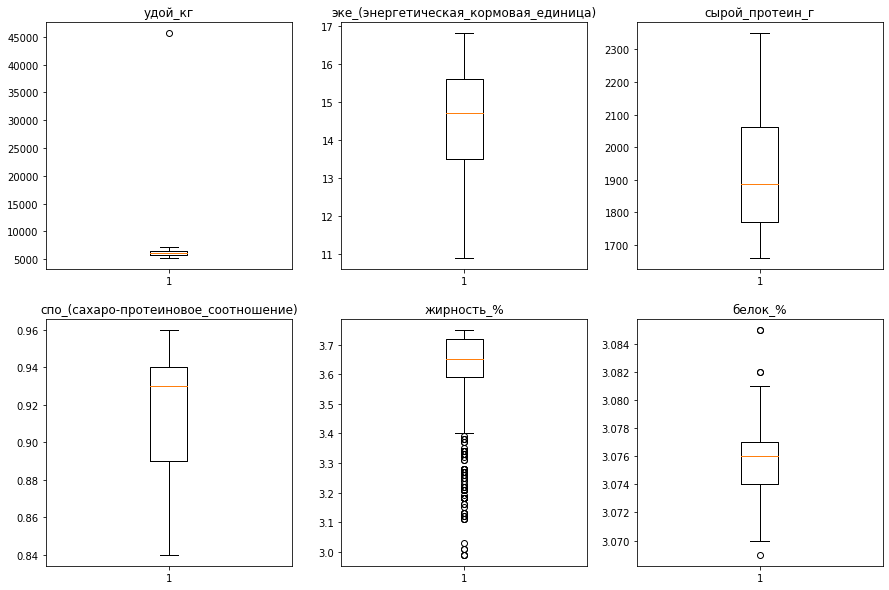

In [18]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
i = 0
for row in range(2):
    for col in range(3):
        axs[row, col].boxplot(df_ferma_main[num_col_names[i]])
        axs[row, col].set_title(num_col_names[i])
        i = i +1

In [19]:
df_ferma_main[num_col_names].describe()

,удой_кг,эке_(энергетическая_кормовая_единица),сырой_протеин_г,спо_(сахаро-протеиновое_соотношение),жирность_%,белок_%
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


Из графиков видно что в наборе данных есть выбросы. Их необходимо найти и исключить

### Работа с выброосами

#### Выбросы в удое

In [20]:
df_ferma_main.query('удой_кг > 8000')

,id,удой_кг,эке_(энергетическая_кормовая_единица),сырой_протеин_г,спо_(сахаро-протеиновое_соотношение),порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍




</div>


In [21]:
res = df_ferma_main.query('удой_кг > 8000').index
df_ferma_main.drop(res, inplace=True)

#### Выбросы в жирности

In [22]:
res = df_ferma_main.loc[(df_ferma_main['жирность_%'] < 3.4)].index
df_ferma_main.drop(res, inplace=True)

#### Выбросы в белках

In [23]:
df_ferma_main['id'].count()

542

In [24]:
def hist_box_plot(df, col_name):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    plt.suptitle(col_name)

    sns.histplot(data=df, x=col_name, ax=axs[0])
    axs[0].set_ylabel('Количество')
    sns.boxplot(data=df, y=col_name, ax=axs[1])
    axs[0].set_title(f'Histogram')
    axs[1].set_title(f'Boxplot')

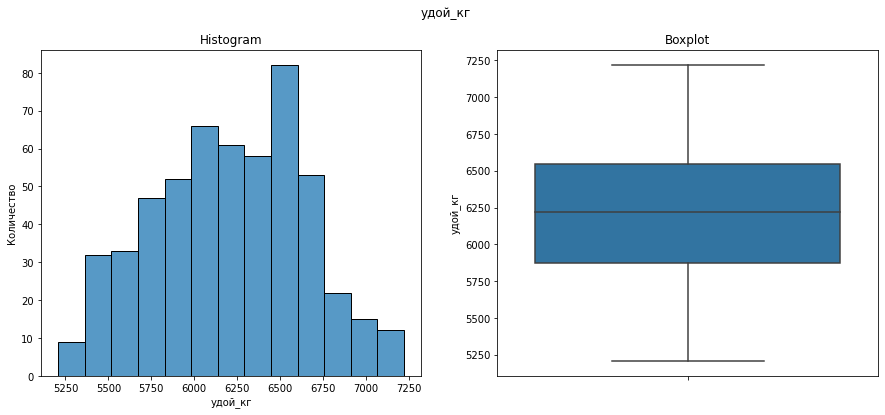

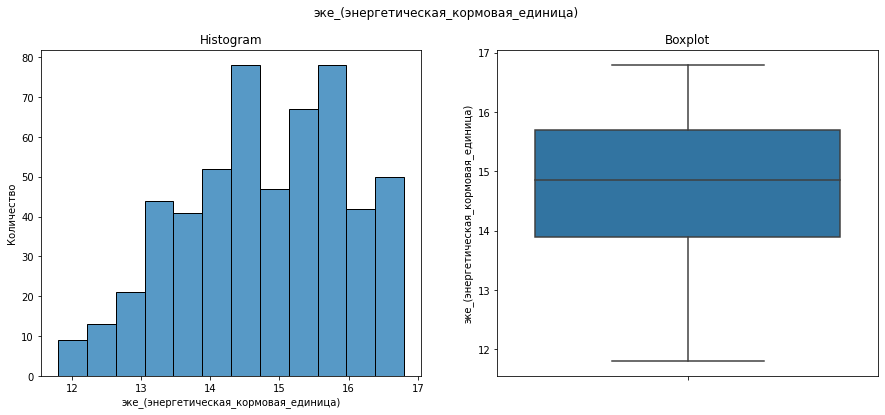

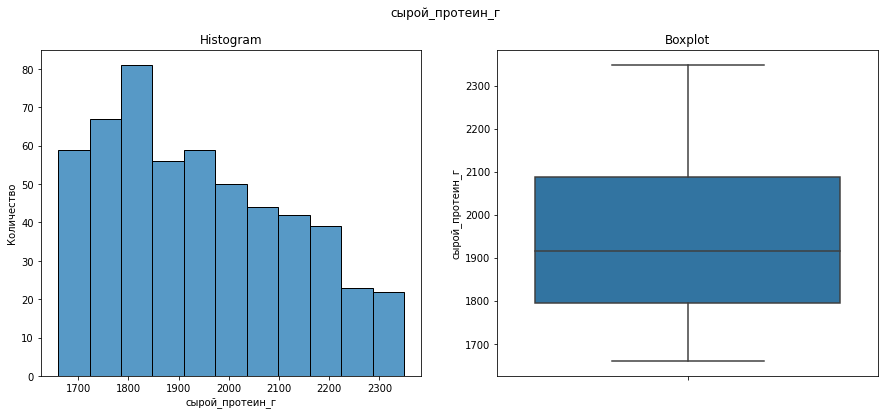

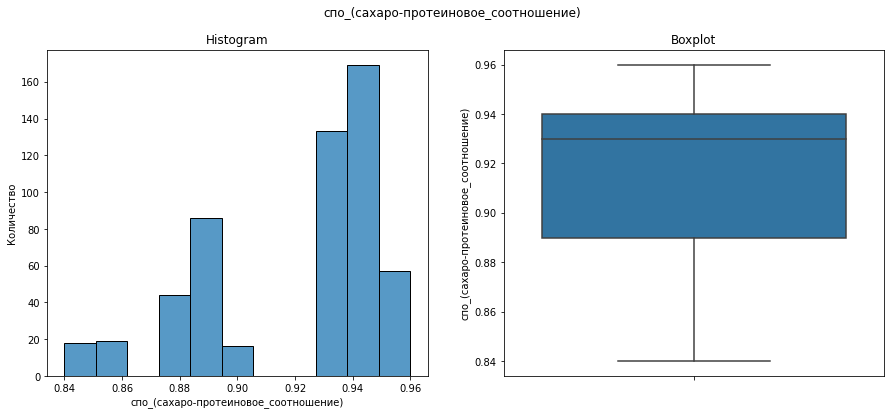

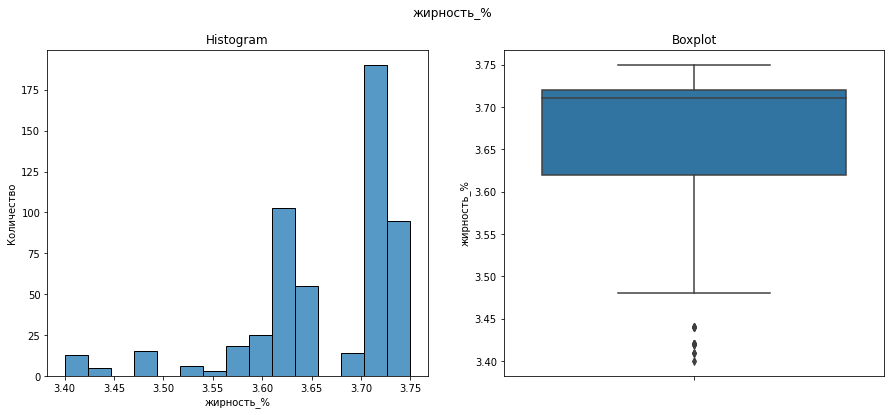

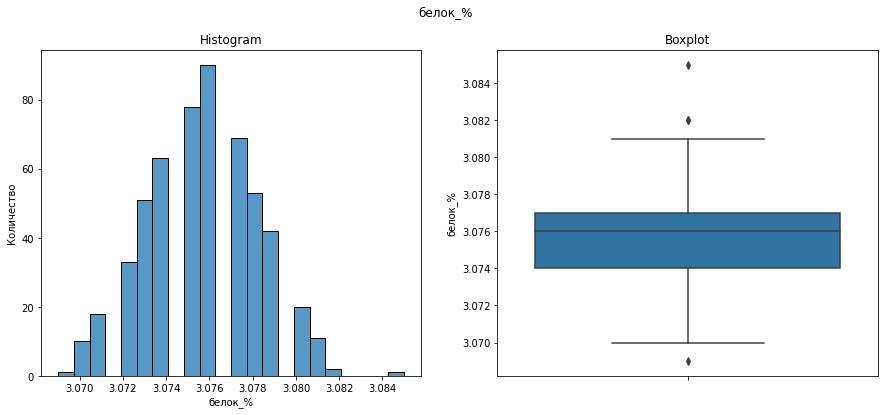

In [25]:
for name in num_col_names:
    hist_box_plot(df_ferma_main, name)

### Итоги исследовательского анализа данных

В ходе исследовательского анализа данных сделано следующие:
1. Данные разделены на две группы. Категориальные и количественные признаки
1. Для категориальных признаков построены гистограммы распределения. Данные распределены относительно равномерно, явных аномалий нет
1. Для количественных признаков построены "ящики с усами". Выявлены выбросы в категориях `удой`, `жирность` и `белок`. Выбросы исключены из набора данных
1. После Исключения выбросов построены гистограммы для количественных признаков. Распределения большинства значений близки или напоминают нормальные. В столбцах `сахаро-протеиновое_соотношение` и `жирность` наблюдаются пробелы на нескольких интервалах. На мой взгляд это объясняется небольшим объемом данных.

**Рекомендации для улучшения набора данных**

В целом данные собраны достаточно качественно. В них не наблюдается значительного количества ошибок, дубликатов или выбросов. В данных совершенно отсутствуют пропуски. Единственный их минус - скудный объем. После финальной очистки в датасете осталось 538 строк. Необходимо собрать больший объем данных.

## Корреляционный анализ

### Группировка данных по признакам

Исходный датасет можно разделить на 4 логические группы
1. Характеристики коровы: `id`, `порода`, `порода_папы_быка`, `возраст`.
1. Характеристики корма: `эке_(энергетическая_кормовая_единица)`, `сырой_протеин_г`, `спо_(сахаро-протеиновое_соотношение)`.
1. Характеристика пастбища: `тип_пастбища`.
1. Характеристики молока: `удой_кг`, `жирность_%`, `белок_%`, `вкус_молока`.

Последняя группа является целевой для нашего исследования. Параметры удой и вкус_молока - целевые

Группировку будем проводить с помощью сводных таблиц. В качестве функции агрегирования выбираем среднее. Связанно это с тем что в данных отсутствуют выбросы и использовать медиану нет необходимости

In [26]:
pivot_feature_cow = df_ferma_main.pivot_table(values='удой_кг',
                                              index=['порода', 'порода_папы_быка', 'возраст'],
                                             columns=['вкус_молока'],
                                             aggfunc='mean')
pivot_feature_cow

вкус_молока                                        вкусно    не вкусно
порода          порода_папы_быка возраст                              
Вис Бик Айдиал  Айдиал           более_2_лет  6428.910000  6343.893939
                                 менее_2_лет  5564.500000  5489.250000
                Соверин          более_2_лет  6105.767123  6102.902439
                                 менее_2_лет  5436.235294  5467.111111
РефлешнСоверинг Айдиал           более_2_лет  6514.700000  6439.255814
                                 менее_2_лет  5386.500000  5382.000000
                Соверин          более_2_лет  6162.890625  6129.972973
                                 менее_2_лет  5497.428571  5380.333333

In [27]:
pivot_feature_feed = df_ferma_main.pivot_table(values='удой_кг',
                                              index=['эке_(энергетическая_кормовая_единица)', 'сырой_протеин_г', 'спо_(сахаро-протеиновое_соотношение)'],
                                             columns=['вкус_молока'],
                                             aggfunc='mean')
pivot_feature_feed.sort_values(by='вкусно', ascending=False)

вкус_молока                                                                                 вкусно  \
эке_(энергетическая_кормовая_единица) сырой_протеин_г спо_(сахаро-протеиновое_соотношение)           
16.8                                  2157            0.95                                  7222.0   
16.6                                  2343            0.94                                  7207.0   
15.8                                  2077            0.94                                  7201.0   
15.6                                  2241            0.94                                  7197.0   
16.7                                  2318            0.95                                  7174.0   
...                                                                                            ...   
16.5                                  1840            0.93                                     NaN   
                                      1987            0.95                                     NaN   
                                      2324            0.95                                     NaN   
16.6                                  2081            0.95                                     NaN   
16.7                                  2349            0.95                                     NaN   

вкус_молока                                                                                 не вкусно  
эке_(энергетическая_кормовая_единица) сырой_протеин_г спо_(сахаро-протеиновое_соотношение)             
16.8                                  2157            0.95                                        NaN  
16.6                                  2343            0.94                                        NaN  
15.8                                  2077            0.94                                        NaN  
15.6                                  2241            0.94                                        NaN  
16.7                                  2318            0.95                                        NaN  
...                                                                                               ...  
16.5                                  1840            0.93                                     6672.0  
                                      1987            0.95                                     6730.0  
                                      2324            0.95                                     6502.0  
16.6                                  2081            0.95                                     6572.0  
16.7                                  2349            0.95                                     6991.0  

[540 rows x 2 columns]

In [28]:
pivot_feature_pasture = df_ferma_main.pivot_table(values='удой_кг',
                                              index=['тип_пастбища'],
                                             columns=['вкус_молока'],
                                             aggfunc='mean')
pivot_feature_pasture

вкус_молока,вкусно,не вкусно
тип_пастбища,,
равнинное,6169.960630,6093.226087
холмистое,6278.454545,6228.460784


Из полученных данных можно сделать следующие предположения:
1. Удой на холмистых пастбищах выше, чем на равнинных
1. У коров возрастом менее 2-х лет удой в среднем ниже 6000 кг в год

Для проверки данных предположений построим диаграммы рассеяния

### Корреляция между признаками

Для поиска линейно корреляции между признаками воспользуемся коэффициентом Пирсона. Построим корреляционную матрицу между количественными признаками. А также для наглядности отобразим диаграмму рассеяния

In [29]:
df_corr = df_ferma_main[num_col_names].corr(method='spearman')
df_corr

,удой_кг,эке_(энергетическая_кормовая_единица),сырой_протеин_г,спо_(сахаро-протеиновое_соотношение),жирность_%,белок_%
удой_кг,1.000000,0.716304,0.374249,0.743805,0.632926,-0.003946
эке_(энергетическая_кормовая_единица),0.716304,1.000000,0.321195,0.695688,0.621294,-0.001935
сырой_протеин_г,0.374249,0.321195,1.000000,0.439416,0.307573,0.236246
спо_(сахаро-протеиновое_соотношение),0.743805,0.695688,0.439416,1.000000,0.665648,0.144176
жирность_%,0.632926,0.621294,0.307573,0.665648,1.000000,0.074007
белок_%,-0.003946,-0.001935,0.236246,0.144176,0.074007,1.000000


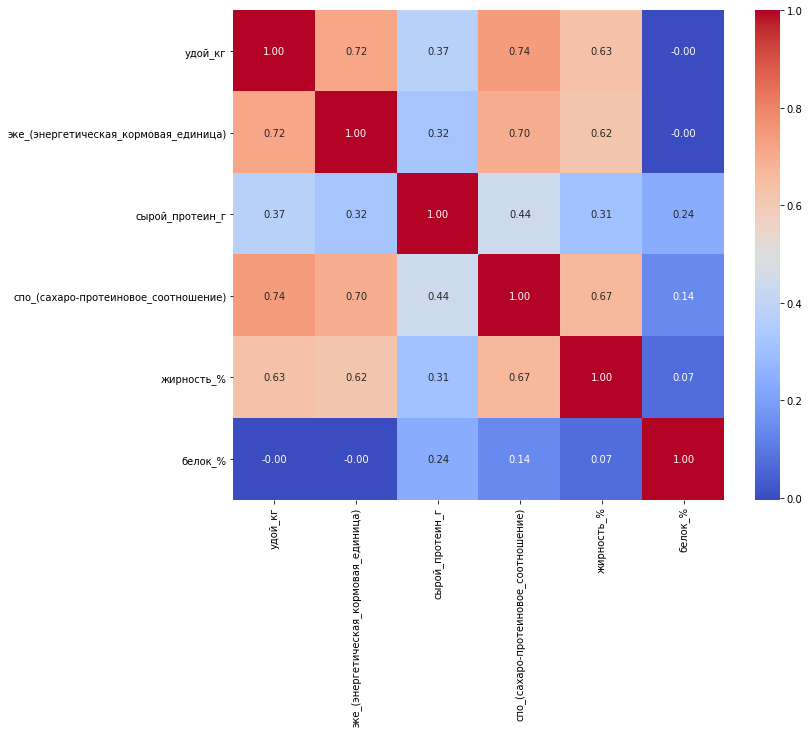

In [30]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='coolwarm');

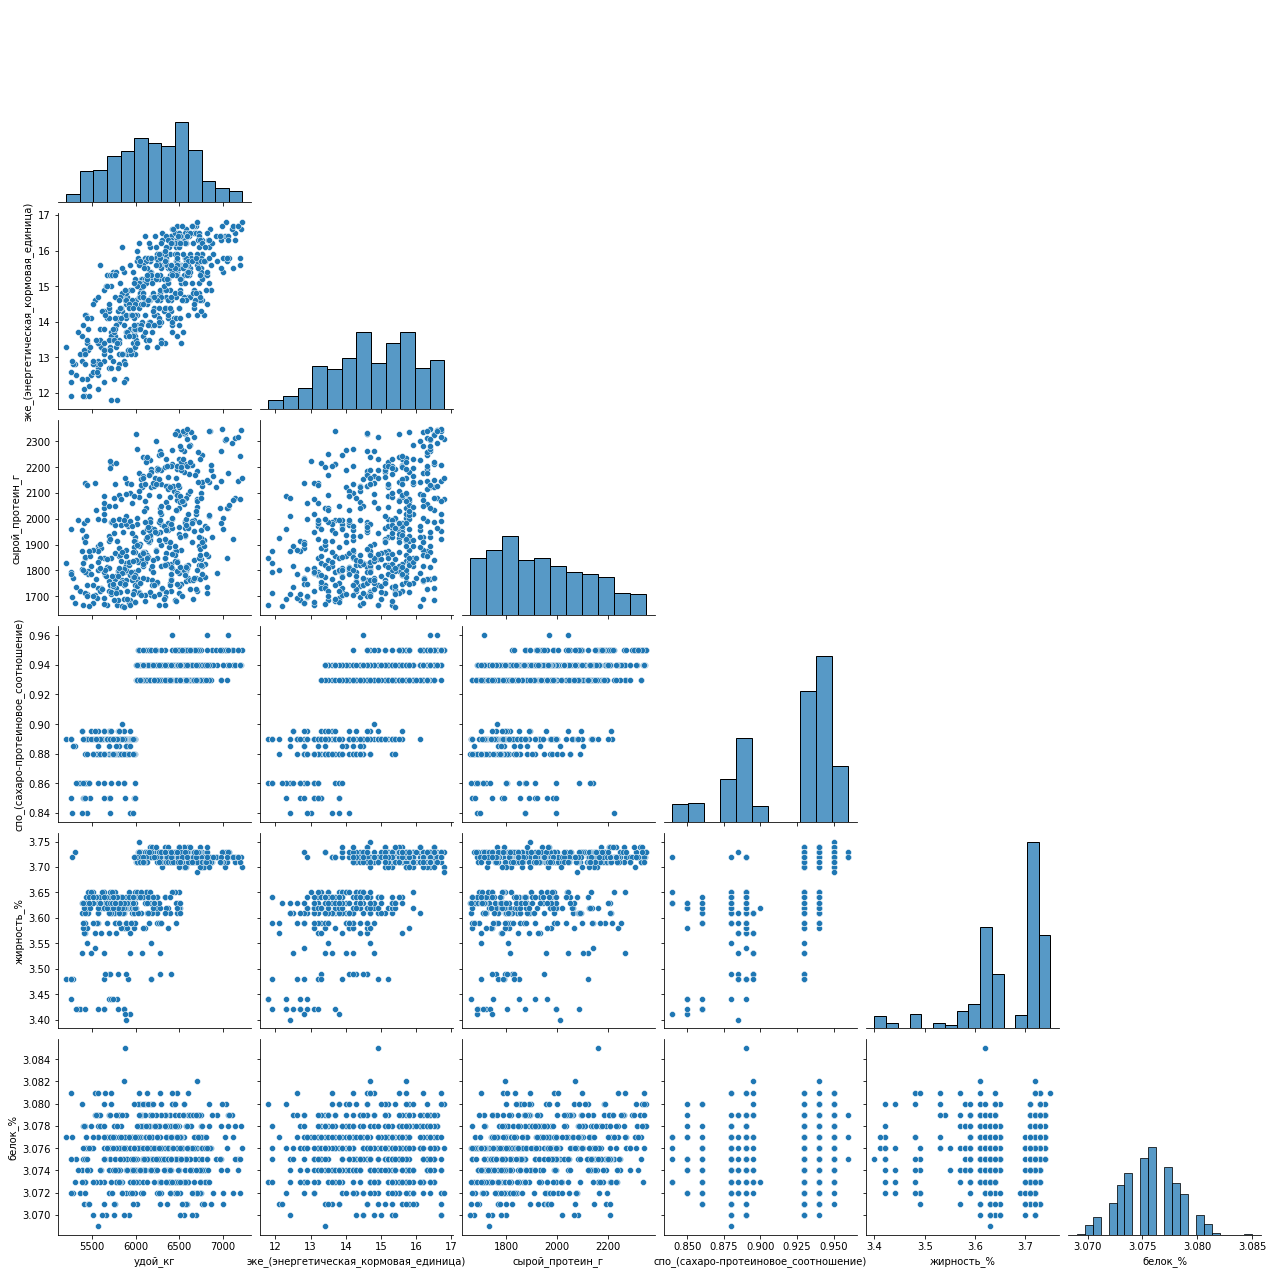

In [31]:
sns.pairplot(data=df_ferma_main[num_col_names], corner=True, height=3.0);

Из корреляционной матрицы видно, что между есть сильная связь между удоем и следующими параметрами:
1. эке_(энергетическая_кормовая_единица)	
1. спо_(сахаро-протеиновое_соотношение)

Средняя связь есть между удоем и жирность_%

Слабая связь есть между удоем и сырой_протеин_г

У удоя нет линейной корреляции с белок_%

### Диаграммы рассеяния

Построим диаграммы рассеяния для всех возможных пар количественных переменных. Однако добавим в них разбивку по категориальным признакам. Значения по осям будут показывать значения количественных признаков. Точки на графике будут отображаться разными цветами в зависимости от принадлежности к той или иной категории.

Для реализации этого принципа напишем функцию которая будет выводить 4 диаграммы рассеяния по 4 парам количественных признаков (удой-...) с учетом разбивки по категориям. Категория передается в функцию как аргумент.

In [32]:
num_col_names = num_col_names[1:-1]
num_col_names

['эке_(энергетическая_кормовая_единица)',
 'сырой_протеин_г',
 'спо_(сахаро-протеиновое_соотношение)',
 'жирность_%']

In [33]:
def scatter_plot_cat(cat, df_in):
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

    par = df_in[cat].unique()

    i = 0

    for row in range(2):
        for col in range(2):
            for name in par:
                df = df_in.loc[df_in[cat] == name]
                sns.scatterplot(data=df, x=num_col_names[i], y='удой_кг', ax=axs[row, col])
                axs[row, col].set_title(f'Связь между "удой_кг" и "{num_col_names[i]}"')
                axs[row, col].set_xlabel(num_col_names[i])
                axs[row, col].set_ylabel('удой_кг')
                axs[row, col].legend(par)
                axs[row, col].grid(True)
            i = i + 1

    fig.suptitle(f'Группировка сделана по столбцу "{cat}"', fontsize=16)

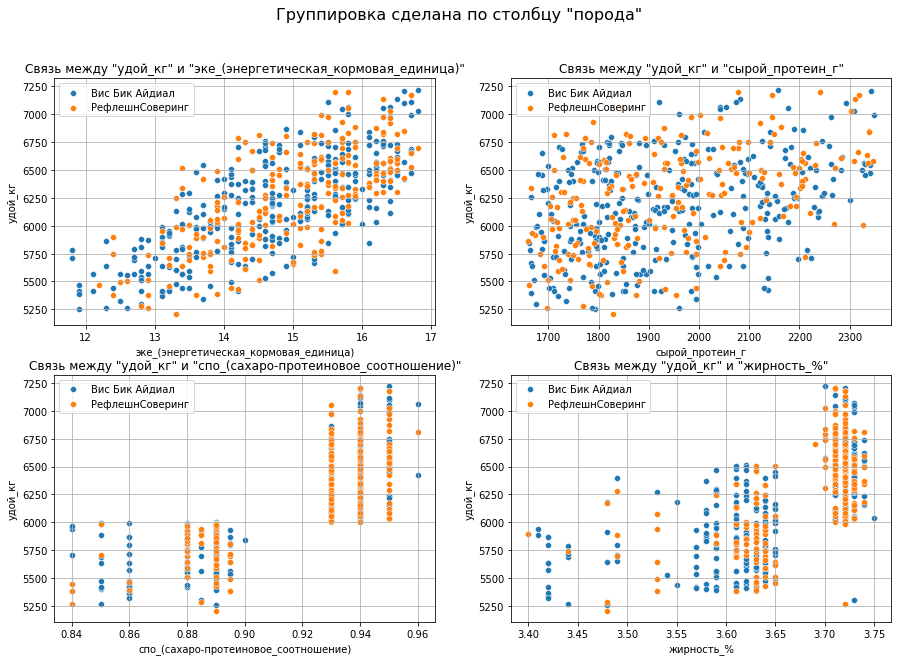

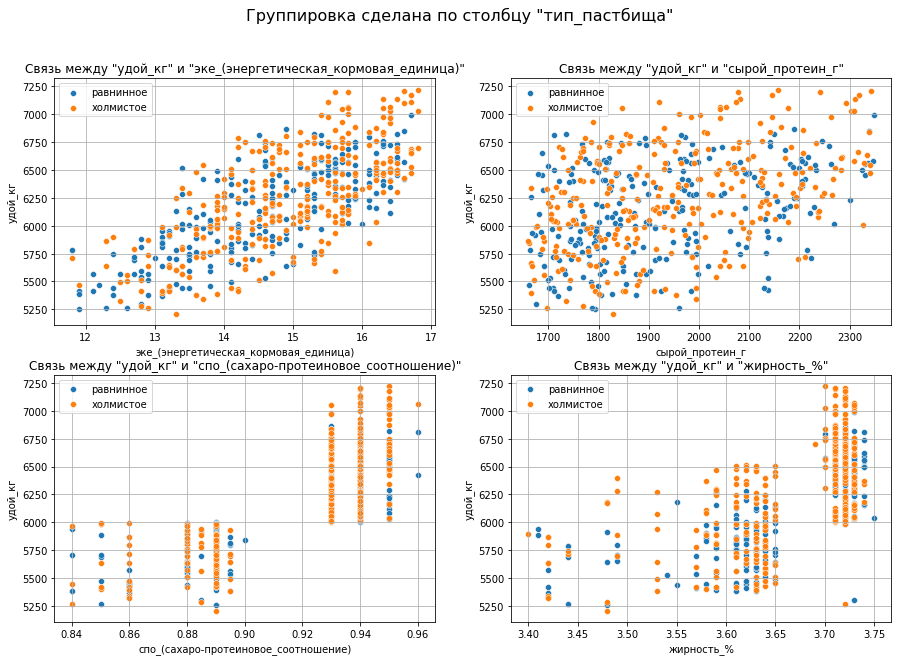

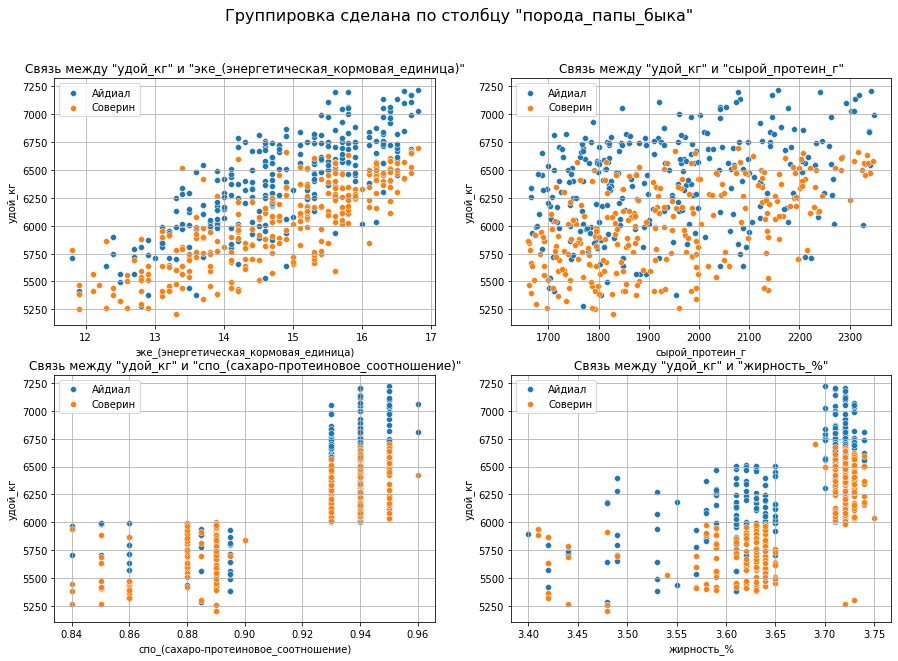

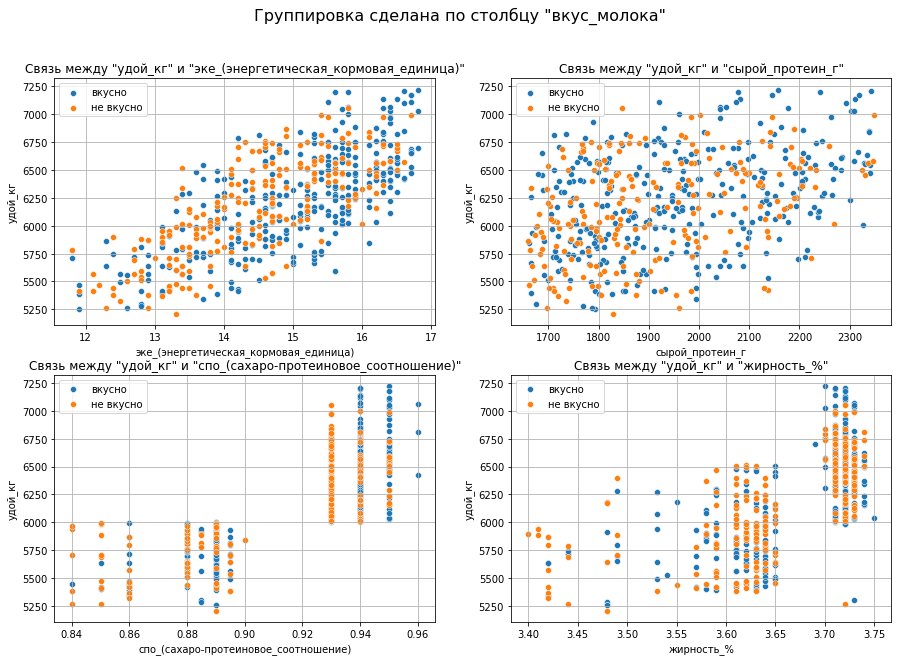

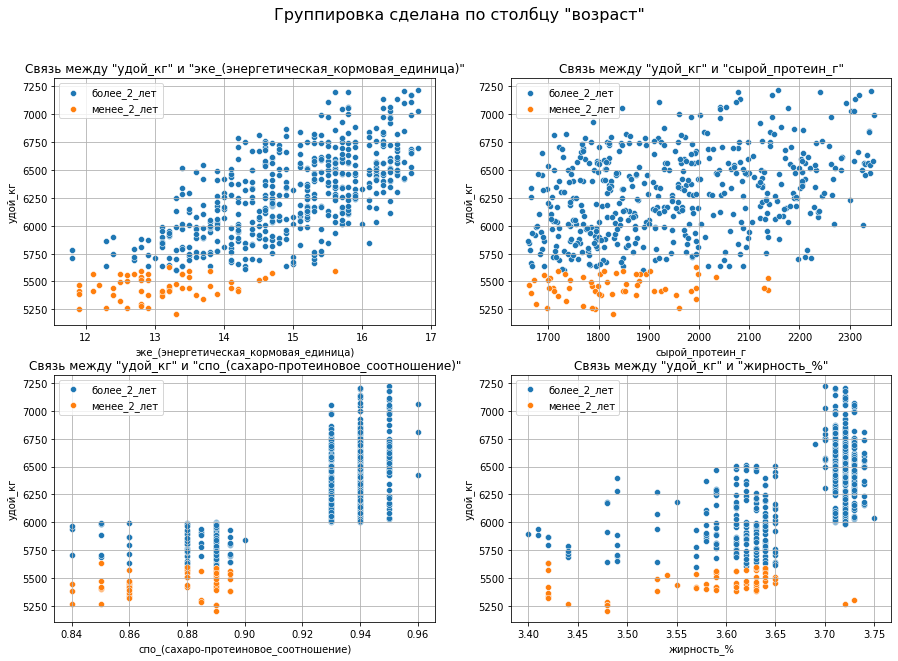

In [34]:
for name in cat_col_names:
    scatter_plot_cat(name, df_ferma_main)

### Итоги корреляционного анализа

В ходе корреляционного анализа данных сделано следующие:
1. Произведена группировка данных по логическим параметрам. Для каждой группы вычислено среднее значение. На основании этого среднего значения сделаны следующие выводы:
    1. Удой на холмистых пастбищах выше, чем на равнинных
    1. У коров возрастом менее 2-х лет удой в среднем ниже 6000 кг в год
1. Построена матрица корреляции между количественными значениями. Из нее определенно что 
1. Построены диаграммы рассеяния

**Выводы:**

При группировке данных сделаны следующие выводы:
1. Удой на холмистых пастбищах выше, чем на равнинных
1. У коров возрастом менее 2-х лет удой в среднем ниже 6000 кг в год
1. Для породы Вис Бик Айдиал при породе папы быка - Соверин удои в среднем значительно ниже. Следовательно, порода папы быка == Айдиал - предпочтительнее
1. Для породы РефлешнСоверинг порода папы быка не имеет сильно значения
На этапе построение матрицы корреляции установлено следующие зависимости: 
1. У значений из столбца удоя есть сильная корреляция со столбцами `эке_(энергетическая_кормовая_единица)`, `спо_(сахаро-протеиновое_соотношение)`
1. Средняя корреляция со столбцом `жирность_%`
1. Слабая со столбцом `сырой_протеин_г`
1. Со столбцом `белок_%` корреляции нет и он отброшен при дальнейшем рассмотрении.

Для всех сочетаний количественных и категориальных типов данных построены матрицы рассеивания. Из них сделаны следующие выводы:
1. От породы зависит соотношение между:
    1. удоем и жирность_%. Порода РефлешнСоверинг при более высоком удое имеет больше значение жирности
    1. Остальные параметры не имеют ярко выраженных тенденций
1. От типа пастбища зависит соотношению между:
    1. Всеми парами количественных параметров. На холмистых пастбищах все значения выше
1. От породы папы быка зависит соотношению между:
    1. Всеми парами количественных параметров. Порода Айдил в среднем имеет большие значения
1. От вкуса молока зависит соотношение между:
    1. удой_кг и эке_(энергетическая_кормовая_единица). Для вкусного молока характерны более высокие значения эке
    1. удой_кг и спо_(сахаро-протеиновое_соотношение). Для вкусного молока характерны более высокие значения спо
    1. Остальные параметры не имеют ярко выраженных тенденций
1. От возраста зависит соотношение между:
    1. Всеми параметрами. Для значения возраста более 2 лет все показатели значительно выше
    
`Сырой_протеин_г` показывает признаки слабой корреляции с удоем. Признаки отсутствия корреляции или ее не линейный характер пресутсвуют в признаке `белок_%`. Он исключен из анализа. `ЭКЕ`, `СПО` и `жирность_%` имеют вид нелинейной корреляции

## Обучение модели линейной регрессии

### Первая модель

#### Разделение на тренировочную и тестовую выборки

In [35]:
X = df_ferma_main.drop(columns=['удой_кг'])
y = df_ferma_main['удой_кг']

RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

#### Кодирование категориальных переменных

In [36]:
num_col_names, cat_col_names = cat_of_dtype(df_ferma_main)

num_col_names = num_col_names[2:-2]
cat_col_names.remove('вкус_молока')

num_col_names, cat_col_names

(['эке_(энергетическая_кормовая_единица)',
  'сырой_протеин_г',
  'спо_(сахаро-протеиновое_соотношение)'],
 ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст'])

In [37]:
encoder = OneHotEncoder(drop='first', sparse=False)

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

df_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
df_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

df_train_ohe.info()
df_test_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   x0_РефлешнСоверинг  406 non-null    float64
 1   x1_холмистое        406 non-null    float64
 2   x2_Соверин          406 non-null    float64
 3   x3_менее_2_лет      406 non-null    float64
dtypes: float64(4)
memory usage: 12.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   x0_РефлешнСоверинг  136 non-null    float64
 1   x1_холмистое        136 non-null    float64
 2   x2_Соверин          136 non-null    float64
 3   x3_менее_2_лет      136 non-null    float64
dtypes: float64(4)
memory usage: 4.4 KB


#### Масштабирование количественных признаков

In [38]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

df_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
df_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

df_train_scaled.info()
df_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 3 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   эке_(энергетическая_кормовая_единица)  406 non-null    float64
 1   сырой_протеин_г                        406 non-null    float64
 2   спо_(сахаро-протеиновое_соотношение)   406 non-null    float64
dtypes: float64(3)
memory usage: 9.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 3 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   эке_(энергетическая_кормовая_единица)  136 non-null    float64
 1   сырой_протеин_г                        136 non-null    float64
 2   спо_(сахаро-протеиновое_соотношение)   136 non-null    float64
dtypes: float64(3)
memory usage: 3.3 KB


#### Объединение данных

In [39]:
X_train = df_train_ohe.join(df_train_scaled)
X_test = df_test_ohe.join(df_test_scaled)

X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   x0_РефлешнСоверинг                     406 non-null    float64
 1   x1_холмистое                           406 non-null    float64
 2   x2_Соверин                             406 non-null    float64
 3   x3_менее_2_лет                         406 non-null    float64
 4   эке_(энергетическая_кормовая_единица)  406 non-null    float64
 5   сырой_протеин_г                        406 non-null    float64
 6   спо_(сахаро-протеиновое_соотношение)   406 non-null    float64
dtypes: float64(7)
memory usage: 22.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0 

#### Упаковка всех шагов выше в одну функцию

In [40]:
def enc_scl_splite(df, num_col_names, cat_col_names):
    encoder = OneHotEncoder(drop='first', sparse=False)
    scaler = StandardScaler()

    X = df.drop(columns=['удой_кг'])
    y = df['удой_кг']

    RANDOM_STATE = 42

    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        random_state=RANDOM_STATE
    )

    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
    X_test_ohe = encoder.transform(X_test[cat_col_names])

    encoder_col_names = encoder.get_feature_names()

    df_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    df_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])

    df_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    df_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

    X_train = df_train_ohe.join(df_train_scaled)
    X_test = df_test_ohe.join(df_test_scaled)

    return X_train, X_test, y_train, y_test

#### Обучение модели

In [41]:
df_ferma_main_1 = df_ferma_main.copy()
df_ferma_main_1.drop(columns=['вкус_молока'], inplace=True)

num_col_names, cat_col_names = cat_of_dtype(df_ferma_main_1)
num_col_names = num_col_names[2:-2]

X_train, X_test, y_train, y_test = enc_scl_splite(df_ferma_main_1, num_col_names, cat_col_names)

model_lr = LinearRegression()

model_lr.fit(X_train, y_train)
result_1 = model_lr.predict(X_test)

#### Оценка качества модели

##### Метрики

In [42]:
def print_metric(y_test, result):
    mae = mean_absolute_error(y_test, result)
    mse = mean_squared_error(y_test, result)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, result)
    print('Корень из средней квадратичной ошибки:', rmse)
    print('Средняя абсолютная ошибка:', mae)
    print('Коэффициент детерминации:', r2)
    result = [rmse, mae, r2]
    return result

In [43]:
metrics_1 = print_metric(y_test, result_1)

Корень из средней квадратичной ошибки: 211.51222891920494
Средняя абсолютная ошибка: 168.8601077719082
Коэффициент детерминации: 0.7594769598684606


##### Анализ остатков

In [44]:
def plot_residuals(y_test, result):
    residuals = y_test - result

    fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
    axs[0].hist(residuals, bins=20)

    axs[0].set_title('Распределение остатков')
    axs[0].set_xlabel('Значение ошибки')
    axs[0].set_ylabel('Количество ошибок')

    axs[1].scatter(result, residuals)

    axs[1].set_title('Диаграмма рессеивания')
    axs[1].set_xlabel('Прогнозные значения')
    axs[1].set_ylabel('Значения ошибки')

    plt.show()

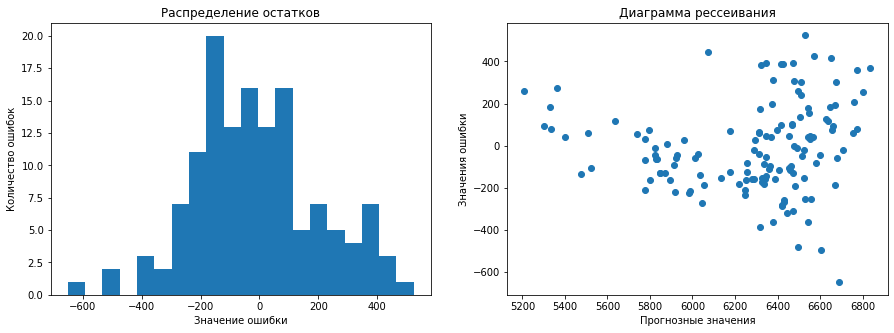

In [45]:
plot_residuals(y_test, result_1)

#### Выводы о модели

Исходя из метрик и анализа остатков можно заключить следующие:
1. Модель предсказывает с точностью в 76%. Это достаточно хороший результат, но его можно улучшить
1. Модель ошибается в среднем на 168 литров молока в год. Однако необходимо проанализировать распределение ошибок
1. Гистограмма распределения остатков имеет симметричное нормальное распределение. Присутствует смещение влево относительно 0 и есть выбросы. Их этого следует, что модель в одном конкретном случае может ошибиться больше чем на 168 литров молока.
1. Распределение точек на диаграмме рассеивания видно, что дисперсия между X и Y неравномерна. График имеет форму рупора

Точность модели уже показывает неплохие результаты, однако их можно улучшить. Возможно стоить трансформировать данные

### Вторая модель

#### Гипотеза для улчушении модели

Рассмотрим количественные параметры еще раз.

In [46]:
num_col_names, cat_col_names = cat_of_dtype(df_ferma_main)

num_col_names = num_col_names[2:-1]
num_col_names

['эке_(энергетическая_кормовая_единица)',
 'сырой_протеин_г',
 'спо_(сахаро-протеиновое_соотношение)',
 'жирность_%']

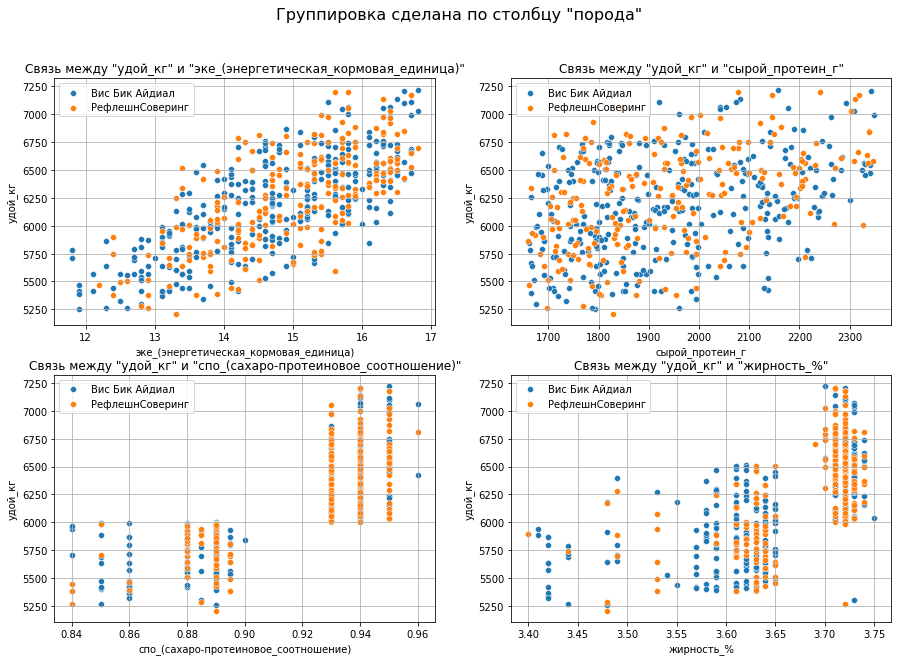

In [47]:
scatter_plot_cat('порода', df_ferma_main)

Из диаграмм рассеяния видно, что признак СПО можно сгруппировать на два кластера меньше 0.92 и больше 0.92. Признак ЭКЕ и Удой также связаны не линейно. Возможно возведение значений в квадрат для признака ЭКЕ изменить ситуацию

#### Обновленный датасет для обучения

In [48]:
df_ferma_main_2 = df_ferma_main_1.copy()
df_ferma_main_2.loc[df_ferma_main_2['спо_(сахаро-протеиновое_соотношение)'] < 0.92, 'спо_кат'] = 'меньше 0.92'
df_ferma_main_2['спо_кат'].fillna(value='больше 0.92', inplace=True)

df_ferma_main_2['эке_в_квадрате'] = df_ferma_main_2['эке_(энергетическая_кормовая_единица)'] ** 2

In [49]:
cat_col_names = cat_of_dtype(df_ferma_main_2)[1]
num_col_names = ['эке_(энергетическая_кормовая_единица)','сырой_протеин_г', 'эке_в_квадрате']

X_train, X_test, y_train, y_test = enc_scl_splite(df_ferma_main_2, num_col_names, cat_col_names)


model_lr = LinearRegression()

model_lr.fit(X_train, y_train)
result_2 = model_lr.predict(X_test)

#### Оценка качества модели

In [50]:
metrics_2 = print_metric(y_test, result_2)

Корень из средней квадратичной ошибки: 209.06460266430625
Средняя абсолютная ошибка: 160.0747367099224
Коэффициент детерминации: 0.7650114315398481


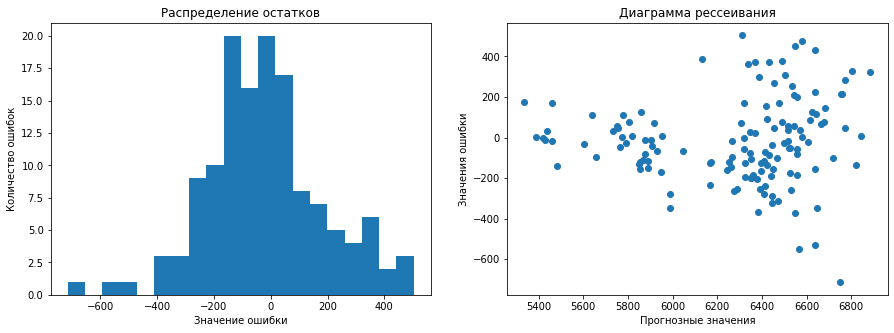

In [51]:
plot_residuals(y_test, result_2)

#### Выводы о модели

In [52]:
metrics_1, metrics_2

([211.51222891920494, 168.8601077719082, 0.7594769598684606],
 [209.06460266430625, 160.0747367099224, 0.7650114315398481])

Результаты работы модели незначительно улучшились. Однако все проблеммы описанные в первой модели сохранились. Уменьшилось смещение гистограммы от нуля

### Третья модель

#### Добавление столбца имя папы

In [53]:
df_ferma_main_3 = df_ferma_main_2.merge(df_ferma_dad, on='id')
df_ferma_main_3

,id,удой_кг,эке_(энергетическая_кормовая_единица),сырой_протеин_г,спо_(сахаро-протеиновое_соотношение),порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,возраст,спо_кат,эке_в_квадрате,имя_папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,более_2_лет,меньше 0.92,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,менее_2_лет,меньше 0.92,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,более_2_лет,меньше 0.92,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,более_2_лет,меньше 0.92,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,менее_2_лет,меньше 0.92,163.84,Барин
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,625,6812,15.4,1964,0.940,РефлешнСоверинг,равнинное,Айдиал,3.74,3.075,более_2_лет,больше 0.92,237.16,Буйный
538,626,5513,12.9,1700,0.880,РефлешнСоверинг,равнинное,Соверин,3.64,3.073,менее_2_лет,меньше 0.92,166.41,Барин
539,627,5970,14.4,1837,0.880,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,более_2_лет,меньше 0.92,207.36,Барин
540,628,5746,13.8,1994,0.890,РефлешнСоверинг,равнинное,Соверин,3.64,3.077,более_2_лет,меньше 0.92,190.44,Барин


In [54]:
cat_col_names = cat_of_dtype(df_ferma_main_3)[1]
num_col_names = ['эке_(энергетическая_кормовая_единица)','сырой_протеин_г', 'эке_в_квадрате']

X_train, X_test, y_train, y_test = enc_scl_splite(df_ferma_main_3, num_col_names, cat_col_names)


model_lr = LinearRegression()

model_lr.fit(X_train, y_train)
result_3 = model_lr.predict(X_test)

#### Оценка качества модели

In [55]:
metrics_3 = print_metric(y_test, result_3)

Корень из средней квадратичной ошибки: 198.17091779753298
Средняя абсолютная ошибка: 148.8750923698893
Коэффициент детерминации: 0.7888624089042827


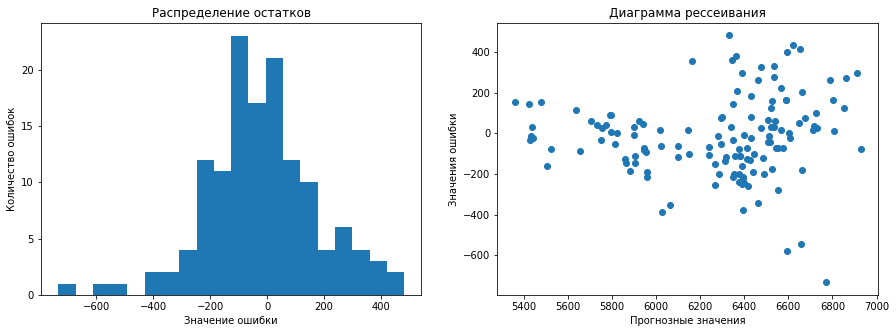

In [56]:
plot_residuals(y_test, result_3)

#### Выводы о модели

In [57]:
metrics_1, metrics_2, metrics_3

([211.51222891920494, 168.8601077719082, 0.7594769598684606],
 [209.06460266430625, 160.0747367099224, 0.7650114315398481],
 [198.17091779753298, 148.8750923698893, 0.7888624089042827])

Исходя из метрик и анализа остатков можно заключить следующие:
1. Наилучший результат показывает модель №3. Модель предсказывает с точностью в 79%.
1. Модель ошибается в среднем на 149 литров молока в год.
1. Гистограмма распределения остатков имеет симметричное нормальное распределение. Однако пресутсвуют выбросы слева. Их этого следует, что модель в одном конкретном случае может ошибиться больше чем на 149 литров молока.
1. Распределение точек на диаграмме рассеивания видно, что дисперсия между X и Y неравномерна. График имеет форму рупора

In [58]:
st.norm.interval(confidence=0.95, loc=np.mean(result_3), scale=st.sem(result_3))

(6212.817730814098, 6337.525157707837)

Из определния доверительного интервала следует что целевой параметр с вероятностью 95% находится в интревале от 6213 до 6338 литров молока в год

### Предсказание удоя с помощью линейной регрессии

Для предсказания удоя необходимо привести данные из датасета df_cow_buy в вид соответсвующий выборке, на которой проводилось обучение. Для этого необходимо добавить столбцы `эке_(энергетическая_кормовая_единица)`, `сырой_протеин_г`, `спо_(сахаро-протеиновое_соотношение)`. Значения в них примем равными средним из обучающего набора с увеличением на 5%

In [59]:
df_mean = df_ferma_main[['эке_(энергетическая_кормовая_единица)',
                         'сырой_протеин_г',
                         'спо_(сахаро-протеиновое_соотношение)']].mean() * 1.05
df_mean

эке_(энергетическая_кормовая_единица)      15.522177
сырой_протеин_г                          2040.440590
спо_(сахаро-протеиновое_соотношение)        0.964460
dtype: float64

In [60]:
df_cow_buy['эке_(энергетическая_кормовая_единица)'] = df_mean['эке_(энергетическая_кормовая_единица)']
df_cow_buy['сырой_протеин_г'] = df_mean['сырой_протеин_г']
df_cow_buy['спо_(сахаро-протеиновое_соотношение)'] = df_mean['спо_(сахаро-протеиновое_соотношение)']

df_cow_buy.loc[df_cow_buy['спо_(сахаро-протеиновое_соотношение)'] < 0.92, 'спо_кат'] = 'меньше 0.92'
df_cow_buy['спо_кат'].fillna(value='больше 0.92', inplace=True)
df_cow_buy.drop(columns=['спо_(сахаро-протеиновое_соотношение)'], inplace=True)

df_cow_buy['эке_в_квадрате'] = df_cow_buy['эке_(энергетическая_кормовая_единица)'] ** 2

In [61]:
num_col_names, cat_col_names = cat_of_dtype(df_cow_buy)
num_col_names = num_col_names[2:]

num_col_names, cat_col_names

(['эке_(энергетическая_кормовая_единица)',
  'сырой_протеин_г',
  'эке_в_квадрате'],
 ['порода',
  'тип_пастбища',
  'порода_папы_быка',
  'имя_папы',
  'возраст',
  'спо_кат'])

Для масштабирования и кодирования признаков сначала необходимо применить метод `fit`. Применять его можно только к учебному набору данных. Для нас это `df_ferma_main_3`

In [62]:
X = df_ferma_main_3.drop(columns=['удой_кг'])

encoder_4 = OneHotEncoder(drop='first', sparse=False)
scaler_4 = StandardScaler()

encoder_4.fit(X[cat_col_names])
X_pred_ohe = encoder_4.transform(df_cow_buy[cat_col_names])
encoder_col_names = encoder_4.get_feature_names()
df_pred_ohe = pd.DataFrame(X_pred_ohe, columns=encoder_col_names)

scaler_4.fit(X[num_col_names])
X_pred_scaled = scaler_4.transform(df_cow_buy[num_col_names])
df_pred_scaled = pd.DataFrame(X_pred_scaled, columns=num_col_names)

X_pred = df_pred_ohe.join(df_pred_scaled)
X_pred

,x0_РефлешнСоверинг,x1_холмистое,x2_Соверин,x3_Буйный,x3_Геркулес,x3_Соловчик,x4_менее_2_лет,x5_меньше 0.92,эке_(энергетическая_кормовая_единица),сырой_протеин_г,эке_в_квадрате
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.628861,0.533664,0.612491
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.628861,0.533664,0.612491
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.628861,0.533664,0.612491
3,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.628861,0.533664,0.612491
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.628861,0.533664,0.612491
5,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.628861,0.533664,0.612491
6,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.628861,0.533664,0.612491
7,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.628861,0.533664,0.612491
8,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.628861,0.533664,0.612491
9,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.628861,0.533664,0.612491


**Вопрос ревьюверу. Меня смущают количественные параметры принимающие значение больше единицы, после масштабирования.** По логике такого не должно возникать. Проверил разброс значений значения из df_ferma_main и df_cow_buy. Они имеют разные интервалы значений. Может ли это так влиять на значения признаков? И нормальны ли значения полученные мною после масштабирования? А отрицательные? Если нет, то как этого избегать?

In [63]:
result_4 = model_lr.predict(X_pred)
result_4 = result_4 - metrics_3[1]
result_4

array([5810.28353408, 6205.2141121 , 6145.1688816 , 5908.57976546,
       5859.02980379, 6168.3408117 , 5858.28770585, 6255.50617171,
       6471.79693466, 5821.41440546, 5810.28353408, 6510.93378403,
       5908.57976546, 6471.79693466, 6168.3408117 , 5858.28770585])

Для отбора коров необходимо определить какие буренки будут давать больше 6000 кг молока в год. Для большей надежности предсказания считаю корректным из полученных результатов отнять среднюю абсолютную ошибку.

In [64]:
df_cow_buy['удой_кг'] = np.round(result_4, 0)
df_buy = df_cow_buy.query('удой_кг > 6000')
df_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность_%,белок_%,возраст,эке_(энергетическая_кормовая_единица),сырой_протеин_г,спо_кат,эке_в_квадрате,удой_кг
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.522177,2040.44059,больше 0.92,240.937983,6205.0
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.522177,2040.44059,больше 0.92,240.937983,6145.0
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.522177,2040.44059,больше 0.92,240.937983,6168.0
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.522177,2040.44059,больше 0.92,240.937983,6256.0
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.522177,2040.44059,больше 0.92,240.937983,6472.0
13,Вис Бик Айдиал,холмистое,Соверин,Барин,3.42,3.075,менее_2_лет,15.522177,2040.44059,больше 0.92,240.937983,6511.0
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.522177,2040.44059,больше 0.92,240.937983,6472.0
17,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.77,3.053,менее_2_лет,15.522177,2040.44059,больше 0.92,240.937983,6168.0


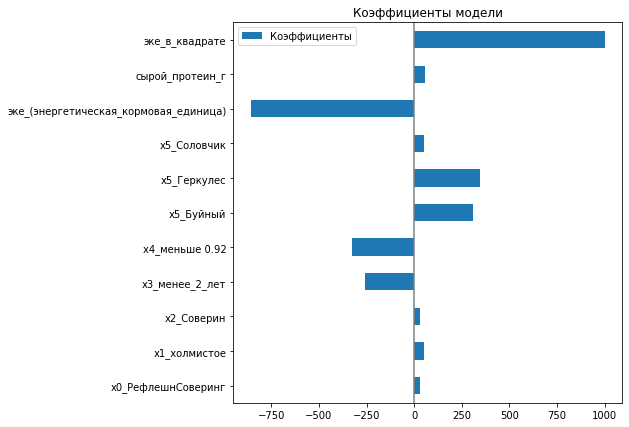

In [65]:
coefs = pd.DataFrame(
    model_lr.coef_, columns=["Коэффициенты"], index=X_train.columns
)

coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Коэффициенты модели")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

### Итоги обучения моделей линейной регрессии 

В ходе обучения моделей линейной регрессии сделано следующие:
1. Обучены три модели линейной регрессии
1. Написана функция для подготовки данных к обучению. Функция выполняет следующие действия
    1. Делит набор данных на тестовую и тренировочные выборки
    1. Кодирует категориальные признаки методом OneHot
    1. Масштабирует количественные данные
    1. Возвращает выборки пригодные для дальнейшего обучения
1. Для каждой из моделей посчитаны метрики rmse, mae. r2
1. Выведены гистограмма распределения остатков и диаграмма рассеивания

Модель под номером 3 показала наилучшие результаты и взята как основная для предсказания целевого параметра.
С помощью обученной модели №3 предсказан целевой признак "удой_кг" для датасета df_cow_buy. Определены коровы, которые будут давать больше 6000 кг молока в год.

## Обучение модели логистической регрессии

### Создание модели

Необходимо подготовить новый датасет под задачу логистической регрессии. Добавим столбцы `спо_кат` и `эке_в_квадрате`. Добавим столбец `имя_папы` и исключим столбец `id`. Целевой признак `вкус_молока` закодируем числами 1 - вкусно, 0 - невкусно

In [66]:
df_ferma_main_4 = df_ferma_main.copy()
df_ferma_main_4.loc[df_ferma_main_4['спо_(сахаро-протеиновое_соотношение)'] < 0.92, 'спо_кат'] = 'меньше 0.92'
df_ferma_main_4['спо_кат'].fillna(value='больше 0.92', inplace=True)
df_ferma_main_4['эке_в_квадрате'] = df_ferma_main_4['эке_(энергетическая_кормовая_единица)'] ** 2
df_ferma_main_4 = df_ferma_main_4.merge(df_ferma_dad, on='id')
df_ferma_main_4.drop(columns=['id', 'спо_(сахаро-протеиновое_соотношение)'], inplace=True)
df_ferma_main_4['вкус_молока'].replace(to_replace='вкусно', value=1, inplace=True)
df_ferma_main_4['вкус_молока'].replace(to_replace='не вкусно', value=0, inplace=True)
df_ferma_main_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 0 to 541
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   удой_кг                                542 non-null    int64  
 1   эке_(энергетическая_кормовая_единица)  542 non-null    float64
 2   сырой_протеин_г                        542 non-null    int64  
 3   порода                                 542 non-null    object 
 4   тип_пастбища                           542 non-null    object 
 5   порода_папы_быка                       542 non-null    object 
 6   жирность_%                             542 non-null    float64
 7   белок_%                                542 non-null    float64
 8   вкус_молока                            542 non-null    int64  
 9   возраст                                542 non-null    object 
 10  спо_кат                                542 non-null    object 
 11  эке_в_

In [67]:
num_col_names, cat_col_names = cat_of_dtype(df_ferma_main_4.drop(columns=['вкус_молока']))

Отобразим корреляционную матрицу. Для исключения мультиколлинеарных признаков

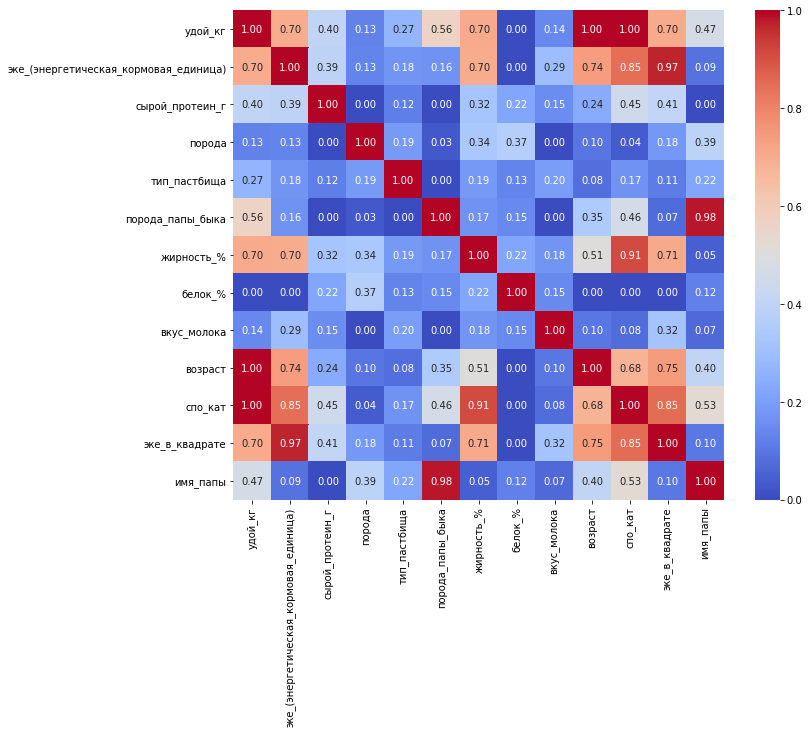

In [68]:
df_corr = df_ferma_main_4.phik_matrix(interval_cols=num_col_names)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='coolwarm');

Для масштабирования и кодирования категориальных признаков используем функцию. В которую передается два датасета (учебный и реальный) и списки с названиями столбцов с категориальными и количественными переменными. Функция вернет тренировочные, валидационные и целевые выборки входных признаков.

In [69]:
def enc_scl_pred(df_train, df_pred, num_col_names, cat_col_names):
    encoder = OneHotEncoder(drop='first', sparse=False)
    scaler = StandardScaler()

    X = df_train.drop(columns=['вкус_молока'])
    y = df_train['вкус_молока']

    RANDOM_STATE = 42

    X_train, X_val, y_train, y_val = train_test_split(
        X,
        y,
        random_state=RANDOM_STATE,
        stratify=y
    )

    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
    X_val_ohe = encoder.transform(X_val[cat_col_names])
    X_pred_ohe = encoder.transform(df_pred[cat_col_names])

    encoder_col_names = encoder.get_feature_names()

    df_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    df_val_ohe = pd.DataFrame(X_val_ohe, columns=encoder_col_names)
    df_pred_ohe = pd.DataFrame(X_pred_ohe, columns=encoder_col_names)

    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_val_scaled = scaler.transform(X_val[num_col_names])
    X_pred_scaled = scaler.transform(df_pred[num_col_names])

    df_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    df_val_scaled = pd.DataFrame(X_val_scaled, columns=num_col_names)
    df_pred_scaled = pd.DataFrame(X_pred_scaled, columns=num_col_names)

    X_train = df_train_ohe.join(df_train_scaled)
    X_val = df_val_ohe.join(df_val_scaled)
    X_pred = df_pred_ohe.join(df_pred_scaled)

    return X_train, X_val, X_pred, y_train, y_val

Обучим модель и сделаем предсказания для целевых признаков. Помимо результатов сохраним значения вероятности для каждого объекта. Это необходимо для дальнейшей оценки качества модели

In [70]:
X_train, X_val, X_pred, y_train, y_val = enc_scl_pred(df_ferma_main_4, df_cow_buy, num_col_names, cat_col_names)

In [71]:
clf = LogisticRegression(random_state=42)
clf = clf.fit(X_train, y_train)

In [72]:
result_4 = clf.predict(X_val)
result_4_proba = clf.predict_proba(X_val)

### Анализ модели

Для оценки модели логистической регрессии используются метрики `accuracy`, `precision` и `recall`. Помимо метрик необходимо построить матрицу ошибок и рассмотреть степень влияния входных признаков на результат

In [73]:
for feature_number, feature_name in enumerate(X_val.columns):
    exp_weight = math.exp(clf.coef_[0, feature_number])
    print(f"{feature_name:<20}: {exp_weight:+.6f}")

x0_РефлешнСоверинг  : +0.897353
x1_холмистое        : +1.735413
x2_Соверин          : +1.164693
x3_менее_2_лет      : +0.854322
x4_меньше 0.92      : +1.986238
x5_Буйный           : +1.416022
x5_Геркулес         : +0.793873
x5_Соловчик         : +0.511061
удой_кг             : +0.628752
эке_(энергетическая_кормовая_единица): +1.266617
сырой_протеин_г     : +1.285676
жирность_%          : +1.205811
белок_%             : +1.219289
эке_в_квадрате      : +1.772560


Text(0.5, 15.0, 'Предсказаный класс')

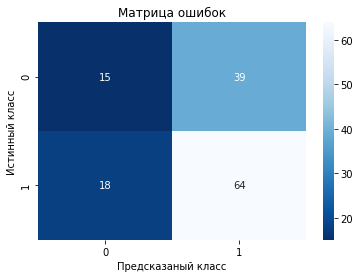

In [74]:
cm = confusion_matrix(y_val, result_4)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказаный класс')

In [75]:
recall = recall_score(y_val, result_4)
precision = precision_score(y_val, result_4)
accuracy = accuracy_score(y_val, result_4)

print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))
print('accurasy: ', round(accuracy, 3))

recall:  0.78
precision:  0.621
accurasy:  0.581


Так как нас интересует получение только вкусного молока мы стремимся снижать ошибки первого рода. То есть исключать ситуацию когда невкусному молоку поставлена метка вкусное. Если мы ошибемся и вкусному молоку присвоим значение невкусного это не так страшно. Поэтому метрика `precision` для нас главнее.

Текущая точность модели нас не устраивает. Корректировать точность необходимой метрики можно двумя путями:
1. Добавить новые входные признаки
1. Изменить пороговые значения

Так как нас устроит увеличение точности по одной из метрик, мы можем изменить пороговые значения модели

### Проговые значения

Создадим новый датафрейм с истинным значением метки и предсказанной вероятностью. Разделим вероятностное расстояние от 0 до 1 на 7 частей, полученные значения это предполагаемые пороговые значения

In [76]:
df_threshold = pd.DataFrame(zip(y_val, result_4_proba[:, 1]),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

df_threshold.head()

,y_valid,y_proba
103,1,0.946988
45,1,0.905637
131,1,0.887421
43,1,0.880371
116,0,0.879369


In [77]:
thresholds = [round(i,2) for i in np.linspace(0.5,1,num = 8,endpoint=False)]
print(thresholds)

[0.5, 0.56, 0.62, 0.69, 0.75, 0.81, 0.88, 0.94]


In [78]:
columns = []
df_threshold_new = df_threshold.copy()

for i in thresholds:
    columns.append('y_pred_'+str(i))
    df_threshold_new['y_pred_'+str(i)] = df_threshold_new['y_proba'].apply(lambda y_proba: 0 if y_proba < i else 1)


df_threshold_new.sample(7)

,y_valid,y_proba,y_pred_0.5,y_pred_0.56,y_pred_0.62,y_pred_0.69,y_pred_0.75,y_pred_0.81,y_pred_0.88,y_pred_0.94
101,0,0.609119,1,1,0,0,0,0,0,0
44,0,0.718460,1,1,1,1,0,0,0,0
56,1,0.738765,1,1,1,1,0,0,0,0
70,1,0.608488,1,1,0,0,0,0,0,0
91,1,0.775623,1,1,1,1,1,0,0,0
96,1,0.714047,1,1,1,1,0,0,0,0
102,1,0.766008,1,1,1,1,1,0,0,0


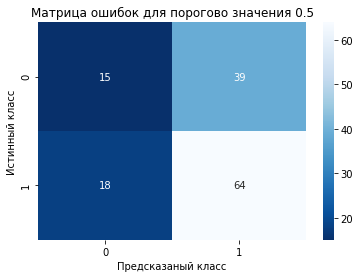

precision для порогово значения 0.5 :  0.621
accurasy для порогово значения 0.5 :  0.581


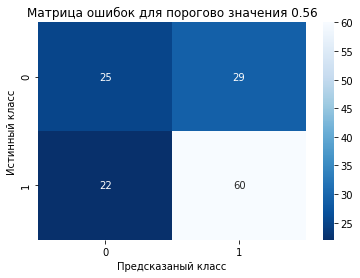

precision для порогово значения 0.56 :  0.674
accurasy для порогово значения 0.56 :  0.625


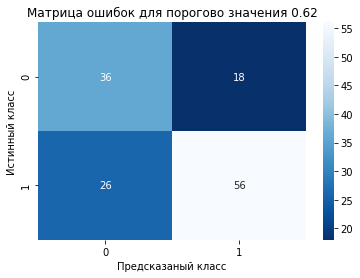

precision для порогово значения 0.62 :  0.757
accurasy для порогово значения 0.62 :  0.676


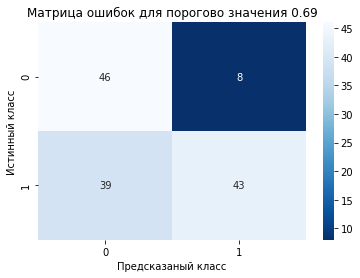

precision для порогово значения 0.69 :  0.843
accurasy для порогово значения 0.69 :  0.654


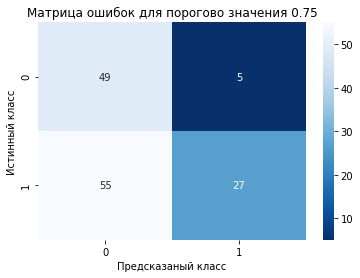

precision для порогово значения 0.75 :  0.844
accurasy для порогово значения 0.75 :  0.559


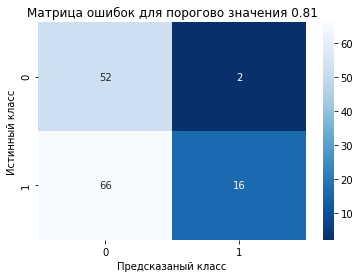

precision для порогово значения 0.81 :  0.889
accurasy для порогово значения 0.81 :  0.5


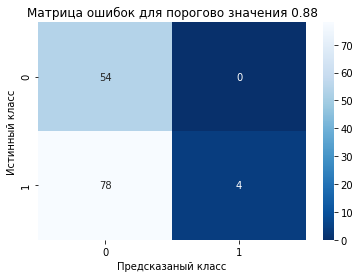

precision для порогово значения 0.88 :  1.0
accurasy для порогово значения 0.88 :  0.426


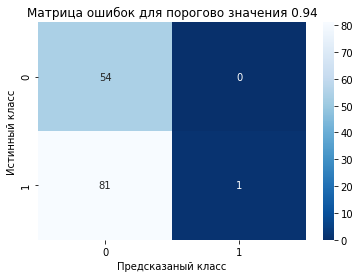

precision для порогово значения 0.94 :  1.0
accurasy для порогово значения 0.94 :  0.404


In [79]:
for i in thresholds:
    y_pred = (result_4_proba[:, 1] > i).astype(int)
    df = pd.DataFrame(zip(y_val, y_pred),
                      columns = ['y_valid', 'y_proba'])
    precision = precision_score(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred)

    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
    plt.title(f'Матрица ошибок для порогово значения {i}')
    plt.ylabel('Истинный класс')
    plt.xlabel('Предсказаный класс')

    plt.show()

    print(f'precision для порогово значения {i} : ',round(precision,3))
    print(f'accurasy для порогово значения {i} : ', round(accuracy, 3))

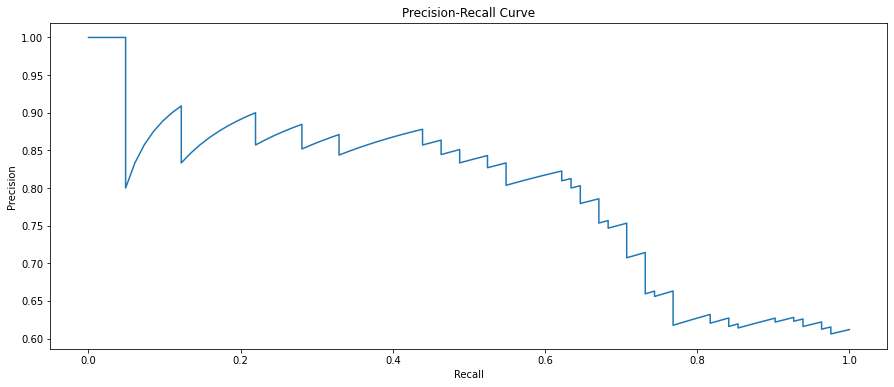

In [80]:
precision, recall, thresholds = precision_recall_curve(y_val, result_4_proba[:, 1])

fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(recall, precision)

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

Из полученных данных видно, что при увеличении порогового значения растет интересующая нас метрика точности растет. Лучшие значения модель показывает при пороговом значении 0.88, однако принимать его как основное нецелесообразно. Связано это со значениями метрики accurasy.

В качестве порогового значения принимает 0.62. Так как при нем наблюдаются наибольшие значения метрик точности.

In [81]:
threshold = 0.62

predicted_class = (result_4_proba[:, 1] > threshold).astype(int)

df_threshold = pd.DataFrame(zip(y_val, predicted_class),
                            columns = ['y_valid', 'y_proba'])

In [82]:
result_5 = clf.predict(X_pred)
result_5_proba = clf.predict_proba(X_pred)
result_5_threshold = (result_5_proba[:, 1] > threshold).astype(int)

result_5, result_5_threshold

(array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1]),
 array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0]))

In [83]:
df_cow_buy['вкус_молока'] = result_5_threshold
df_buy = df_cow_buy.query('вкус_молока == 1')
df_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность_%,белок_%,возраст,эке_(энергетическая_кормовая_единица),сырой_протеин_г,спо_кат,эке_в_квадрате,удой_кг,вкус_молока
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.522177,2040.44059,больше 0.92,240.937983,5810.0,1
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.522177,2040.44059,больше 0.92,240.937983,6205.0,1
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.522177,2040.44059,больше 0.92,240.937983,5859.0,1
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.522177,2040.44059,больше 0.92,240.937983,5858.0,1
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.522177,2040.44059,больше 0.92,240.937983,6256.0,1
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.522177,2040.44059,больше 0.92,240.937983,5821.0,1
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.522177,2040.44059,больше 0.92,240.937983,6472.0,1


### Итоги обучения модели логистической регрессии

В ходе обучения моделей логистической регрессии сделано следующие:
1. Обработанны входные признаки
1. Написана функция для подготовки данных к обучению. Функция выполняет следующие действия
    1. Делит набор данных на тестовую и тренировочные выборки
    1. Кодирует категориальные признаки методом OneHot
    1. Масштабирует количественные данные
    1. Возвращает выборки пригодные для дальнейшего обучения
1. Посчитаны метрики `accuracy`, `precision` и `recall`. Построена матрица ошибок
1. Опредлено пороговое значение дающие большую точность модели

Главной метрикой для задачи проназирования вкуса молока является `precision` так как мы не можем ошибаться и называть невкусное молоко вкусным. Поэтому ошибки первого рода менее недопустимы для модели. Предсказан вкус молока для коров доступных к покупке

## Итоговые выводы

Была проделана масштабная работа по анализу данных. Далее приведены результаты проделанной работы

**В ходе предобработки данных сделано следующие:**
1. Названия столбцов приведены к корректному виду. Исключены пробелы и запятые
1. Произведен анализ типов данных. Они корректны правок не требуется
1. Устранены явные дубликаты строк
1. Устранены неявные дубликаты значений в столбце `тип_пастбища`

**В ходе исследовательского анализа данных сделано следующие:**
1. Данные разделены на две группы. Категориальные и количественные признаки
1. Для категориальных признаков построены гистограммы распределения. Данные распределены относительно равномерно, явных аномалий нет
1. Для количественных признаков построены "ящики с усами". Выявлены выбросы в категориях `удой`, `жирность` и `белок`. Выбросы исключены из набора данных
1. После Исключения выбросов построены гистограммы для количественных признаков. Распределения большинства значений близки или напоминают нормальные. В столбцах `сахаро-протеиновое_соотношение` и `жирность` наблюдаются пробелы на нескольких интервалах. На мой взгляд это объясняется небольшим объемом данных.

Рекомендации для улучшения набора данных

В целом данные собраны достаточно качественно. В них не наблюдается значительного количества ошибок, дубликатов или выбросов. В данных совершенно отсутствуют пропуски. Единственный их минус - скудный объем. После финальной очистки в датасете осталось 538 строк. Необходимо собрать больший объем данных.

**В ходе корреляционного анализа данных сделано следующие:**
1. Произведена группировка данных по логическим параметрам. Для каждой группы вычислено среднее значение. На основании этого среднего значения сделаны следующие выводы:
    1. Удой на холмистых пастбищах выше, чем на равнинных
    1. У коров возрастом менее 2-х лет удой в среднем ниже 6000 кг в год
1. Построена матрица корреляции между количественными значениями. Из нее определенно что 
1. Построены диаграммы рассеяния

При группировке данных сделаны следующие выводы:
1. Удой на холмистых пастбищах выше, чем на равнинных
1. У коров возрастом менее 2-х лет удой в среднем ниже 6000 кг в год
1. Для породы Вис Бик Айдиал при породе папы быка - Соверин удои в среднем значительно ниже. Следовательно, порода папы быка == Айдиал - предпочтительнее
1. Для породы РефлешнСоверинг порода папы быка не имеет сильно значения
На этапе построение матрицы корреляции установлено следующие зависимости: 
1. У значений из столбца удоя есть сильная корреляция со столбцами `эке_(энергетическая_кормовая_единица)`, `спо_(сахаро-протеиновое_соотношение)`
1. Средняя корреляция со столбцом `жирность_%`
1. Слабая со столбцом `сырой_протеин_г`
1. Со столбцом `белок_%` корреляции нет и он отброшен при дальнейшем рассмотрении.

`Сырой_протеин_г` показывает признаки слабой корреляции с удоем. Признаки отсутствия корреляции или ее не линейный характер пресутсвуют в признаке `белок_%`. Он исключен из анализа. `ЭКЕ`, `СПО` и `жирность_%` имеют вид нелинейной корреляции

**В ходе обучения моделей линейной регрессии сделано следующие:**
1. Обучены три модели линейной регрессии
1. Написана функция для подготовки данных к обучению. Функция выполняет следующие действия
    1. Делит набор данных на тестовую и тренировочные выборки
    1. Кодирует категориальные признаки методом OneHot
    1. Масштабирует количественные данные
    1. Возвращает выборки пригодные для дальнейшего обучения
1. Для каждой из моделей посчитаны метрики rmse, mae. r2
1. Выведены гистограмма распределения остатков и диаграмма рассеивания

Модель под номером 3 показала наилучшие результаты и взята как основная для предсказания целевого параметра.
С помощью обученной модели №3 предсказан целевой признак "удой_кг" для датасета df_cow_buy. Определены коровы, которые будут давать больше 6000 кг молока в год.

**В ходе обучения моделей логистической регрессии сделано следующие:**
1. Обработанны входные признаки
1. Написана функция для подготовки данных к обучению. Функция выполняет следующие действия
    1. Делит набор данных на тестовую и тренировочные выборки
    1. Кодирует категориальные признаки методом OneHot
    1. Масштабирует количественные данные
    1. Возвращает выборки пригодные для дальнейшего обучения
1. Посчитаны метрики `accuracy`, `precision` и `recall`. Построена матрица ошибок
1. Опредлено пороговое значение дающие большую точность модели

Главной метрикой для задачи проназирования вкуса молока является `precision` так как мы не можем ошибаться и называть невкусное молоко вкусным. Поэтому ошибки первого рода менее допустимы для модели. Предсказан вкус молока для коров доступных к покупке

В ходе исследования удалось с высокой степенью доставерности предсказать целевые параметры `вкус_молока` и `удой_кг`. 
**Целью проекта** было проанализировать данные о коровах, предлагаемых к покупке, и отобрать подходящие под запросы клиента экземпляры.
У фермера есть два критерия для отбора коров:
1. Каждая корова должна давать в среднем не менее 6000 кг молока в год
1. Молоко должно быть вкусным

Из предложенных к покупке коров этим двум параметрам удовлетворяют только три коровы под индексом 1, 9 и 16

In [84]:
df_buy = df_cow_buy.query('(вкус_молока == 1) and (удой_кг > 6000)')
df_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность_%,белок_%,возраст,эке_(энергетическая_кормовая_единица),сырой_протеин_г,спо_кат,эке_в_квадрате,удой_кг,вкус_молока
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.522177,2040.44059,больше 0.92,240.937983,6205.0,1
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.522177,2040.44059,больше 0.92,240.937983,6256.0,1
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.522177,2040.44059,больше 0.92,240.937983,6472.0,1
